# Dataset Overview:

Name: House Sales Prediction in King County, USA (from Kaggle)

Description: This dataset contains details about house sales in King County, which includes columns such as:
- id: A unique identifier for each sale
- date: The date of the sale
- price: The sale price of the house (target variable)
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the living space
- sqft_lot: Square footage of the lot
- floors: Number of floors
- waterfront: Whether the house is waterfront or not
- view: Quality of the view (scale 0-4)
- condition: Condition of the house (scale 1-5)
- grade: Overall grade of the house (scale 1-13)
- sqft_above: Square footage of the house excluding the basement
- sqft_basement: Square footage of the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated (if applicable)
- zipcode: Zip code where the house is located
- lat: Latitude of the house
- long: Longitude of the house
- sqft_living15: Living room area in the nearest 15 neighbors
- sqft_lot15: Lot size of the nearest 15 neighbors

Motivation: This is a real-world regression problem, which involves predicting the house price based on multiple features. The dataset is relatively simple but still presents a challenge due to the number of features and the potential for complex relationships between them. We will use this dataset to train a neural network to predict house prices based on these features.

ReLU(x)=max(0,x)

PROS: Solves the vanishing gradient problem, allowing networks to train deeper architectures.

CONS: Can cause "dead neurons" where ReLU units stop learning if they get stuck at zero.

For this dataset, ReLU would be more useful in hidden layers since it’s less likely to suffer from vanishing gradients in a deep neural network.

Sigmoid: σ(x)=11+e−x\sigma(x) = \frac{1}{1 + e^{-x}}σ(x)=1+e−x1

PROS: Sigmoid outputs are between 0 and 1, making it useful for binary classification or as a non-linear activation.

CONS: Sigmoid can cause vanishing gradients, especially with deep networks.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("kc_house_data.csv")

In [3]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Preprocess the dataset

# Sigmoid and ReLU Layers (Regresssion NN)

In [10]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[features].values
y = df['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Derivative Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# ReLU Derivative Function
def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

# Adam Optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, grads, params):
        self.t += 1
        if self.m is None:
            self.m = {key: np.zeros_like(val) for key, val in params.items()}
            self.v = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            
            m_hat = self.m[key] / (1 - self.beta1**self.t)
            v_hat = self.v[key] / (1 - self.beta2**self.t)
            
            params[key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        
        # He initialization for ReLU
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))  # Bias for first hidden layer
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))  # Bias for second hidden layer
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))  # Bias for output layer

        # Initialize Adam optimizer
        self.optimizer = AdamOptimizer(learning_rate=0.001)
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3
    
    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]
        
        # Compute the gradients for the output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute the gradients for the second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute the gradients for the first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights with Adam optimizer
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }

        # Update parameters with Adam optimizer
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with Adam
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1)
nn.train(X_train, y_train, epochs=100)

# Make predictions on the test set
predictions_scaled = nn.forward(X_test)

# Inverse scale the predictions
predictions = y_scaler.inverse_transform(predictions_scaled)

# Convert y_test back to original scale
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE in original scale
mse = np.mean((predictions - y_test_original)**2)
print("\nTest MSE:", mse)

# Calculate MSE with scaled values
mse_scaled = np.mean((predictions_scaled - y_test.reshape(-1, 1))**2)
print("\nMSE on Scaled Data:", mse_scaled)

rmse = np.sqrt(mse)
print("\nTest RMSE:", rmse)

# Compare predictions and true values (first 10 examples)
print("\nPredictions vs True Values (First 10):")
print(np.hstack((predictions[:10], y_test_original[:10])))


Epoch 0, Loss: 2.5581049277871375
Epoch 10, Loss: 0.7422638150303882
Epoch 20, Loss: 0.5168407533530734
Epoch 30, Loss: 0.3976703615778282
Epoch 40, Loss: 0.33370839816475495
Epoch 50, Loss: 0.29701455944603683
Epoch 60, Loss: 0.2712601946539908
Epoch 70, Loss: 0.2530582176682363
Epoch 80, Loss: 0.23928309619296928
Epoch 90, Loss: 0.22821176529399856

Test MSE: 36822895338.63552

MSE on Scaled Data: 0.2732152347631798

Test RMSE: 191892.9267550931

Predictions vs True Values (First 10):
[[ 420856.27215571  365000.        ]
 [ 571717.71876478  865000.        ]
 [1348316.09377985 1038000.        ]
 [2044345.94276219 1490000.        ]
 [ 699037.30773614  711000.        ]
 [ 366040.46887776  211000.        ]
 [ 827856.6450776   790000.        ]
 [ 504279.19717859  680000.        ]
 [ 447844.01006433  384500.        ]
 [ 397170.1883068   605000.        ]]


- MSE = 36,813,582,627.6118: This is consistent with the magnitude of house prices, though still quite high.

- RMSE ($191,868.66) indicates that predictions are, on average, off by this amount, which might still be significant for lower-priced houses.

- MSE on Scaled Data:0.273: This indicates that the model performs well in the normalized space, but some issues arise when translating back to the original scale.
 

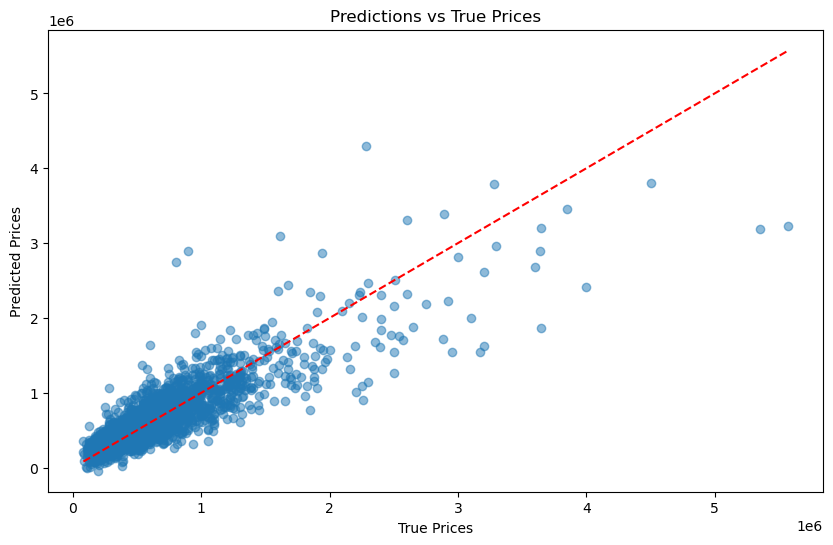

In [ ]:
#Scatter Plot: Predictions vs True Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predictions, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Predictions vs True Prices")
plt.show()

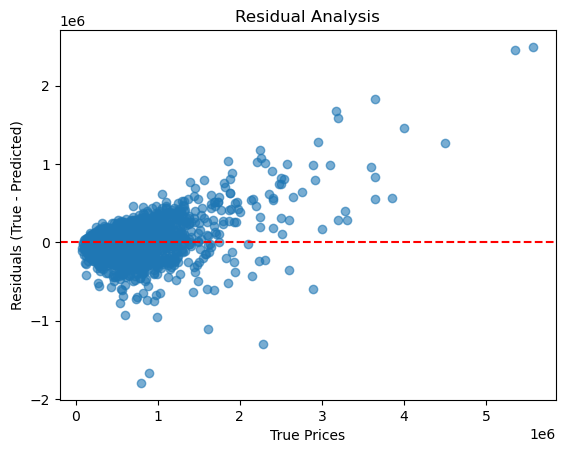

In [ ]:
#Residual Plot

residuals = y_test_original - predictions
import matplotlib.pyplot as plt
plt.scatter(y_test_original, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Analysis')
plt.show()

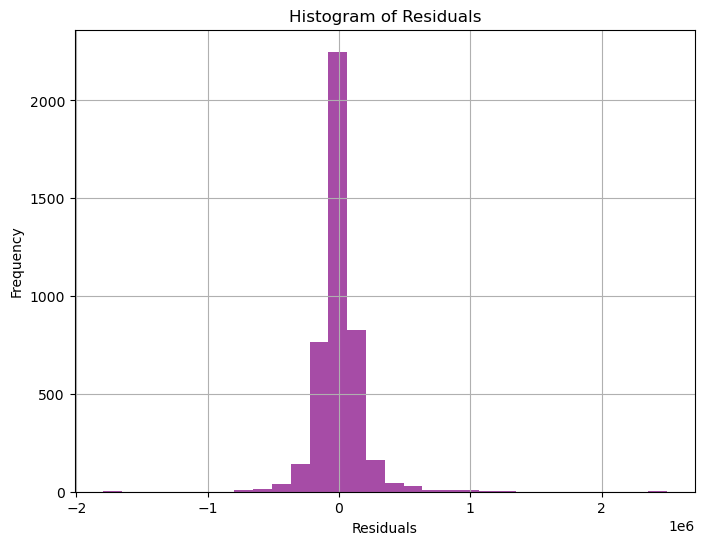

In [ ]:
#Histogram of Residuals

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Softmax Layer (Classification NN)

In [ ]:
# to conclude

# Dropout

In [16]:
# Define the dropout layer function
def dropout(X, dropout_rate, training=True):
    if training:
        mask = np.random.rand(*X.shape) < (1 - dropout_rate)
        X = X * mask / (1 - dropout_rate)
    return X

# Updated Neural Network class with dropout
class NeuralNetworkWithDropout:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size=1, dropout_rate=0.3):
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        
        self.W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, output_size))

        self.optimizer = AdamOptimizer(learning_rate=0.001)
        self.dropout_rate = dropout_rate  # The dropout rate (e.g., 0.3 means 30% of neurons will be dropped)

    def forward(self, X, training=True):
        # First hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.A1 = dropout(self.A1, self.dropout_rate, training)

        # Second hidden layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.A2 = dropout(self.A2, self.dropout_rate, training)

        # Output layer
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.Z3  # Linear output for regression
        return self.A3

    def backward(self, X, y, learning_rate=0.0001, lambda_reg=0.01):
        m = X.shape[0]

        # Compute gradients for output layer
        dZ3 = self.A3 - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        # Compute gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Compute gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Apply L2 regularization
        grads = {
            'W1': dW1 + lambda_reg * self.W1,
            'W2': dW2 + lambda_reg * self.W2,
            'W3': dW3 + lambda_reg * self.W3,
            'b1': db1,
            'b2': db2,
            'b3': db3
        }
        
        # Update parameters
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'W3': self.W3,
            'b1': self.b1,
            'b2': self.b2,
            'b3': self.b3
        }
        
        self.optimizer.update(grads, params)

        # Update model parameters
        self.W1 = params['W1']
        self.W2 = params['W2']
        self.W3 = params['W3']
        self.b1 = params['b1']
        self.b2 = params['b2']
        self.b3 = params['b3']

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            self.forward(X, training=True)  
            self.backward(X, y)
            if epoch % 10 == 0:
                loss = mse_loss(self.A3, y)
                print(f"Epoch {epoch}, Loss: {loss}")

# Initialize and train the neural network with dropout
nn_dropout = NeuralNetworkWithDropout(input_size=X_train.shape[1], hidden_size1=128, hidden_size2=64, output_size=1, dropout_rate=0.5)
nn_dropout.train(X_train, y_train, epochs=100)

Epoch 0, Loss: 7.393426211973784
Epoch 10, Loss: 4.372228691829685
Epoch 20, Loss: 3.2482041069855336
Epoch 30, Loss: 2.780317815237445
Epoch 40, Loss: 2.2431917852100294
Epoch 50, Loss: 1.9284259115167075
Epoch 60, Loss: 1.662321662138122
Epoch 70, Loss: 1.5623466461045863
Epoch 80, Loss: 1.4281417689583331
Epoch 90, Loss: 1.2867300166906788
